In [13]:
#  add karna-python-backend to the path
import sys
sys.path.append('C:/Users/Prince/Documents/GitHub/Proejct-Karna/offline-ai-assistant/karna-python-backend')

from importlib import reload  # Not needed in Python 2
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

logger = logging.getLogger(__name__)

import os
import json
from typing import List
from datetime import datetime
from config.paths import workspace_data_dir, workspace_dir
from omni_helper import get_omniparser_inference_data, OmniParserResultModel, OmniParserResultModelList
from services.screen_capture_service import ScreenshotEvent

In [14]:
def run_omniparser_inference(json_file_path: str):
    logger.info(f"Loading screenshot events from JSON file: {json_file_path}")
        
    if not os.path.exists(json_file_path):
        raise FileNotFoundError(f"JSON file not found: {json_file_path}")
    
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f:
            events_data = json.load(f)
    except json.JSONDecodeError as e:
        raise ValueError(f"Invalid JSON in file: {str(e)}")
    
    if not events_data or not isinstance(events_data, list):
        raise ValueError("JSON file does not contain a list of screenshot events")
    
    # Convert JSON data to ScreenshotEvent objects
    screenshot_events = []
    for event_dict in events_data:
        # Convert ISO format string back to datetime
        if 'timestamp' in event_dict:
            event_dict['timestamp'] = datetime.fromisoformat(event_dict['timestamp']) # type: ignore
        
        screenshot_path = event_dict["screenshot_path"]
        # convert screenshot_path to proper path using paths config
        screenshot_path = workspace_dir / screenshot_path
        event_dict["screenshot_path"] = screenshot_path
        # Create ScreenshotEvent object
        try:
            event = ScreenshotEvent(**event_dict)
            screenshot_events.append(event)
        except (TypeError, ValueError) as e:
            logger.warning(f"Skipping invalid event: {str(e)}")
    
    logger.info(f"Loaded {len(screenshot_events)} screenshot events from JSON file")
    return get_omniparser_inference_data(screenshot_events, caption_icons=False), screenshot_events

In [15]:
json_file_name = "chatgpt/883c46f5-c62d-4799-baa1-5e3b12f12e8c/screenshot_events_883c46f5-c62d-4799-baa1-5e3b12f12e8c.json"
omni_inference_data_results , screenshot_events = run_omniparser_inference(os.path.join(workspace_data_dir, json_file_name))
omni_inference_data = omni_inference_data_results.omniparser_result_models



03:37:08 INFO:Loading screenshot events from JSON file: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\chatgpt/883c46f5-c62d-4799-baa1-5e3b12f12e8c/screenshot_events_883c46f5-c62d-4799-baa1-5e3b12f12e8c.json
03:37:08 INFO:Loaded 4 screenshot events from JSON file
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
03:37:18 INFO:Parsing image path: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\chatgpt\883c46f5-c62d-4799-baa1-5e3b12f12e8c\screenshots\raw\screenshot_20250329_131725_617204.png


Omniparser initialized!!!
image size: (1920, 1080)

0: 736x1280 94 icons, 86.0ms
Speed: 0.0ms preprocess, 86.0ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


03:37:20 INFO:Created omniparser result for event_id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
03:37:20 INFO:Getting omniparser result model for event_id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
03:37:20 INFO:Converting parsed content df to bounding boxes for event_id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
03:37:20 INFO:Creating omniparser result model for event_id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
03:37:20 INFO:Created omniparser result model for event_id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
03:37:20 INFO:Parsing image path: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\chatgpt\883c46f5-c62d-4799-baa1-5e3b12f12e8c\screenshots\raw\screenshot_20250329_131729_196616.png


len(filtered_boxes): 101 38
time to get parsed content: 0.0
image size: (1920, 1080)

0: 736x1280 90 icons, 81.9ms
Speed: 0.0ms preprocess, 81.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 97 37
time to get parsed content: 0.0


03:37:22 INFO:Created omniparser result for event_id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
03:37:22 INFO:Getting omniparser result model for event_id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
03:37:22 INFO:Converting parsed content df to bounding boxes for event_id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
03:37:22 INFO:Creating omniparser result model for event_id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
03:37:22 INFO:Created omniparser result model for event_id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
03:37:22 INFO:Parsing image path: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\chatgpt\883c46f5-c62d-4799-baa1-5e3b12f12e8c\screenshots\raw\screenshot_20250329_131757_316854.png


image size: (1920, 1080)

0: 736x1280 91 icons, 82.6ms
Speed: 0.0ms preprocess, 82.6ms inference, 0.0ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 100 36
time to get parsed content: 0.0


03:37:24 INFO:Created omniparser result for event_id: bf685989-b84d-40ba-8287-5770a19a5f0c
03:37:24 INFO:Getting omniparser result model for event_id: bf685989-b84d-40ba-8287-5770a19a5f0c
03:37:24 INFO:Converting parsed content df to bounding boxes for event_id: bf685989-b84d-40ba-8287-5770a19a5f0c
03:37:24 INFO:Creating omniparser result model for event_id: bf685989-b84d-40ba-8287-5770a19a5f0c
03:37:24 INFO:Created omniparser result model for event_id: bf685989-b84d-40ba-8287-5770a19a5f0c
03:37:24 INFO:Parsing image path: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\chatgpt\883c46f5-c62d-4799-baa1-5e3b12f12e8c\screenshots\raw\screenshot_20250329_131801_573080.png


image size: (1920, 1080)

0: 736x1280 91 icons, 66.6ms
Speed: 0.0ms preprocess, 66.6ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 100 36
time to get parsed content: 0.0


03:37:26 INFO:Created omniparser result for event_id: 2d269a28-6aac-4484-84e7-18e7cf719987
03:37:26 INFO:Getting omniparser result model for event_id: 2d269a28-6aac-4484-84e7-18e7cf719987
03:37:26 INFO:Converting parsed content df to bounding boxes for event_id: 2d269a28-6aac-4484-84e7-18e7cf719987
03:37:26 INFO:Creating omniparser result model for event_id: 2d269a28-6aac-4484-84e7-18e7cf719987
03:37:26 INFO:Created omniparser result model for event_id: 2d269a28-6aac-4484-84e7-18e7cf719987
03:37:26 INFO:Completed getting omniparser result models for 4 events


In [16]:
logger.info(f"Loaded {len(omni_inference_data)} omniparser result models")

03:37:26 INFO:Loaded 4 omniparser result models


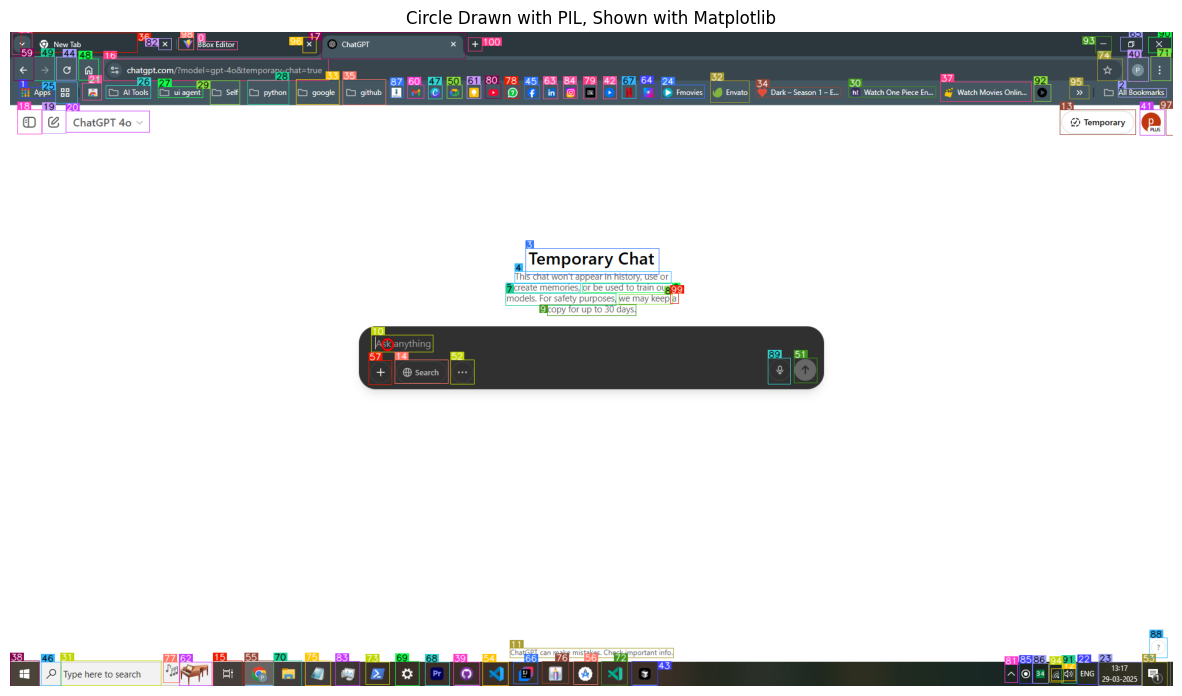

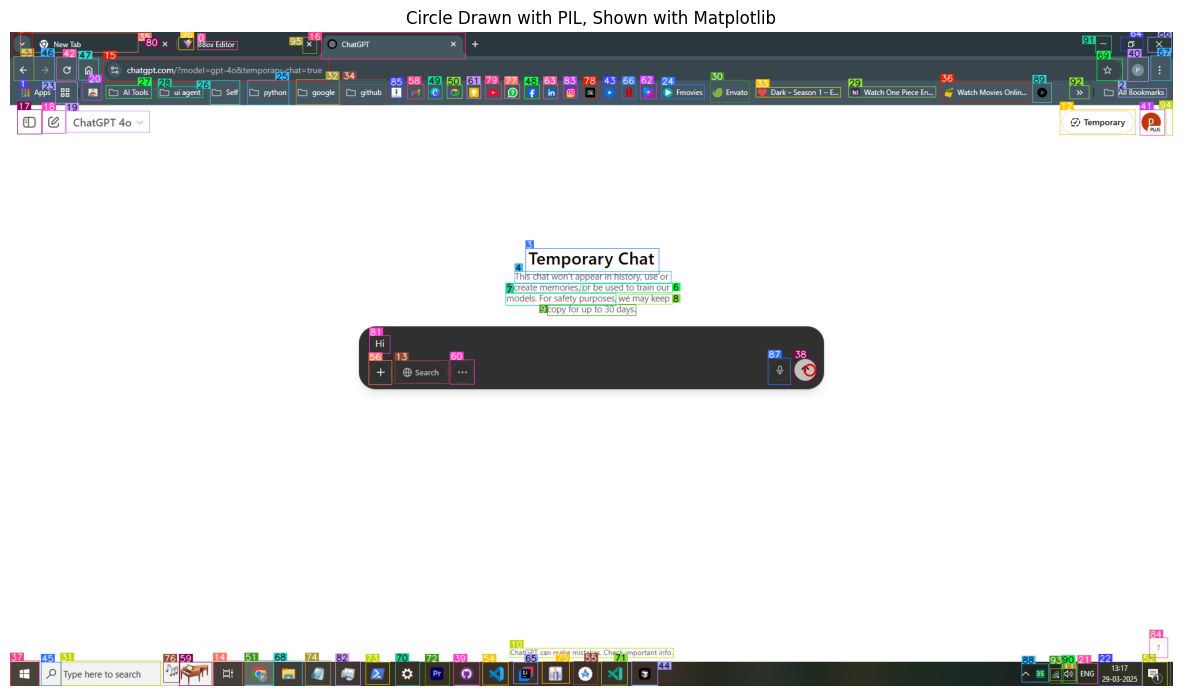

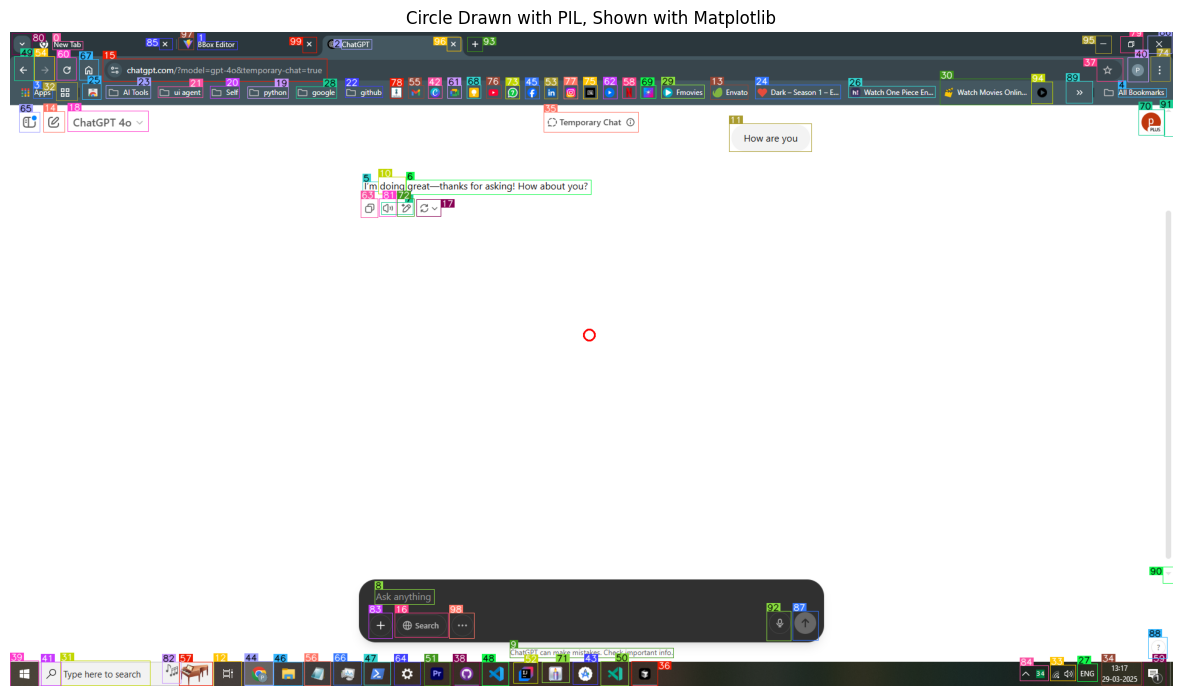

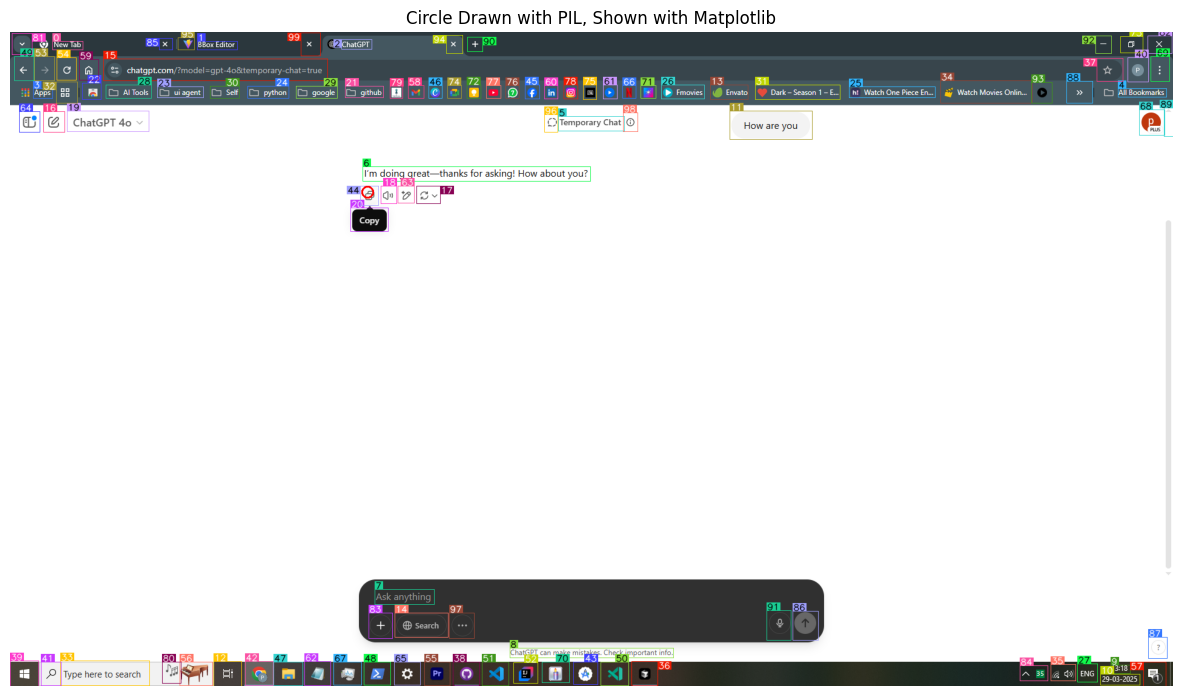

In [56]:
import base64
import matplotlib.pyplot as plt
import io
from PIL import Image, ImageDraw
import numpy as np
def plot_base64_image(base64_image: str, figsize=(15,15)):
    plt.figure(figsize=figsize)

    image = Image.open(io.BytesIO(base64.b64decode(base64_image)))
    plt.axis('off')

    plt.imshow(image)

def plot_dino_labled_img(omniparser_result_model: OmniParserResultModel):
    plot_base64_image(omniparser_result_model.omniparser_result.dino_labled_img)
    
def plot_dino_labled_img_with_click_coords(omniparser_result_model: OmniParserResultModel, screenshot_events: List[ScreenshotEvent]):
    dino_labled_img = omniparser_result_model.omniparser_result.dino_labled_img
    result_event_id = omniparser_result_model.event_id
    # find corresponding screenshot event
    screenshot_event = None
    for event in screenshot_events:
        if event.event_id == result_event_id:
            screenshot_event = event
            break
    if screenshot_event is None:
        print(f"No screenshot event found for result event id: {result_event_id}")
        return
    
    x, y = screenshot_event.mouse_x, screenshot_event.mouse_y
    radius = 10
    if x is None or y is None:
        print(f"No mouse click coords found for result event id: {result_event_id}")
        return
    # open image and draw a circle at the mouse click coords
    image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
    draw = ImageDraw.Draw(image)
    draw.ellipse((x - radius, y - radius, x + radius, y + radius), outline="red", width=3)
    # Step 2: Convert PIL image to NumPy array
    image_np = np.array(image)

    # Step 3: Display using matplotlib
    plt.figure(figsize=(15,15))
    plt.imshow(image_np)
    plt.axis("off")  # Hide axes
    plt.title("Circle Drawn with PIL, Shown with Matplotlib")
    plt.show()

# for omniparser_result_model in omni_inference_data:
#     plot_dino_labled_img(omniparser_result_model)
    
for omniparser_result_model in omni_inference_data:
    plot_dino_labled_img_with_click_coords(omniparser_result_model, screenshot_events)


In [18]:
from omni_helper import ParsedContentResult, OmniparserResult
class PreProcessor:
    def __init__(self, omniparser_result: OmniparserResult, parsed_content_results: List[ParsedContentResult],):
        self.omniparser_result = omniparser_result
        self.parsed_content_results = parsed_content_results
        
    def pre_process_parsed_content_results(self):
        """
        This method pre-processes the parsed content results.
        """
        for parsed_content_result in self.parsed_content_results:
            parsed_content_result.bbox = self._convert_relative_bbox_to_absolute_bbox(
                parsed_content_result.bbox, 
                self.omniparser_result.original_image_width, 
                self.omniparser_result.original_image_height)
            
    def _convert_relative_bbox_to_absolute_bbox(self, relative_bbox: List[float], image_width: int, image_height: int) -> List[float]:
        """
        This method converts the relative bbox to absolute bbox.
        original_realtive_bbox: [0.7447916865348816, 0.6000000238418579, 0.8177083134651184, 0.6222222447395325]
        convert to absolute bbox
        """
        absolute_bbox = [
            relative_bbox[0] * image_width,
            relative_bbox[1] * image_height,
            relative_bbox[2] * image_width,
            relative_bbox[3] * image_height
        ]
        # round the bbox to the nearest integer
        absolute_bbox = [float(round(coord)) for coord in absolute_bbox]
        # convert to absolute bbox
        return absolute_bbox
for omniparser_result_model in omni_inference_data:
        pre_processor = PreProcessor(omniparser_result=omniparser_result_model.omniparser_result, parsed_content_results=omniparser_result_model.parsed_content_results)
        pre_processor.pre_process_parsed_content_results()

In [19]:
# lets get parsed_content_result at each mouse click from the screenshot_events
# {event_id: str, parsed_content_result: ParsedContentResult, mouse_click_coords: Tuple[int, int]}
parsed_content_results_with_mouse_click_coords = {}
for screenshot_event in screenshot_events:
    for omniparser_result_model in omni_inference_data:
        if omniparser_result_model.event_id == screenshot_event.event_id:
            _parsed_content_results = omniparser_result_model.parsed_content_results
            x, y = screenshot_event.mouse_x, screenshot_event.mouse_y
            if x is None or y is None:
                print(f"No mouse click coords found for result event id: {omniparser_result_model.event_id}")
                continue
            for item in _parsed_content_results:
                # check if the bbox contains the mouse click coords
                if item.bbox[0] <= x <= item.bbox[2] and item.bbox[1] <= y <= item.bbox[3]:
                    print(f"Item {item.id} contains the mouse click coords {x, y} for event id: {omniparser_result_model.event_id}")
                    print( f"   Item: {item}")
                    parsed_content_results_with_mouse_click_coords[omniparser_result_model.event_id] = {
                        "parsed_content_result": item,
                        "mouse_click_coords": (x, y),
                    }
            break
print(f"Total parsed_content_results with mouse click coords: {len(parsed_content_results_with_mouse_click_coords)}")
# pretty print the parsed_content_results_with_mouse_click_coords
print(parsed_content_results_with_mouse_click_coords)


Item 10 contains the mouse click coords (623, 516) for event id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b
   Item: ParsedContentResult(type='text', bbox=[596.0, 500.0, 698.0, 528.0], interactivity=False, content='AAsk anything', source='box_ocr_content_ocr', id=10)
Item 38 contains the mouse click coords (1320, 558) for event id: 2065c037-ad71-41ff-b4b7-72ad3cfbc481
   Item: ParsedContentResult(type='icon', bbox=[1294.0, 539.0, 1333.0, 578.0], interactivity=True, content=None, source='box_yolo_content_yolo', id=38)
Item 44 contains the mouse click coords (590, 264) for event id: 2d269a28-6aac-4484-84e7-18e7cf719987
   Item: ParsedContentResult(type='icon', bbox=[578.0, 254.0, 609.0, 286.0], interactivity=True, content=None, source='box_yolo_content_yolo', id=44)
Total parsed_content_results with mouse click coords: 3
{'9b073de5-e2c1-468f-a1ce-b7d033d4be7b': {'parsed_content_result': ParsedContentResult(type='text', bbox=[596.0, 500.0, 698.0, 528.0], interactivity=False, content='AAsk anyth

In [29]:
def find_item_with_id_in_results_dict(id: int, results_dict):
    for event_id, result in results_dict.items():
        if result["parsed_content_result"].id == id:
            return result, event_id
    return None

def check_if_str_contains_substr(input_str, substr):
    return input_str.__contains__(substr)

def update_content_in_item(item: ParsedContentResult, new_content: str, str_contains_substr_enabled=False):
    original_content = item.content
    if str_contains_substr_enabled and check_if_str_contains_substr(original_content, new_content):
        print(f"Skipped updating content as-{original_content} already contains-{new_content}")
        return item
    item.content = new_content
    return item

def find_and_update_content_in_item(id: int, results_dict, content: str):
    item, event_id = find_item_with_id_in_results_dict(id, results_dict)
    
    print(f"Item found: {item}")
    if item is not None:
        print(f"Updating content in item content from-{item['parsed_content_result'].content} to-{content}")
        item = update_content_in_item(item['parsed_content_result'], content)
    return item,event_id

In [ ]:
# print(find_item_with_id_in_results_dict(10, parsed_content_results_with_mouse_click_coords))
# use user input to update the content of the item
# list all the ids in the parsed_content_results_with_mouse_click_coords with their content
print("List of available items with their ids and content:")
for id, item in parsed_content_results_with_mouse_click_coords.items():
    print(f"Item {item['parsed_content_result'].id}: {item['parsed_content_result'].content}")
id = int(input("Enter the id of the item to update: "))
# item_parsed_content_result = find_item_with_id_in_results_dict(id, parsed_content_results_with_mouse_click_coords)['parsed_content_result']
# print(f"Item parsed content result: {item_parsed_content_result}")
content = input("Enter the new content: ")
if content != "":
    updated_item = find_and_update_content_in_item(id, parsed_content_results_with_mouse_click_coords, content)
    print(f"Updated item: {updated_item[0]}")
    print(f"event id: {updated_item[1]}")
else:
    print("Skipping update because content is empty")

List of available items with their ids and content:
Item 10: Ask anything
Item 38: None
Item 44: None
Item found: {'parsed_content_result': ParsedContentResult(type='text', bbox=[596.0, 500.0, 698.0, 528.0], interactivity=False, content='Ask anything', source='box_ocr_content_ocr', id=10), 'mouse_click_coords': (623, 516)}
Updating content in item content from-Ask anything to-Ask anything
Updated item: ParsedContentResult(type='text', bbox=[596.0, 500.0, 698.0, 528.0], interactivity=False, content='Ask anything', source='box_ocr_content_ocr', id=10)
event id: 9b073de5-e2c1-468f-a1ce-b7d033d4be7b


In [45]:
from typing import Tuple, Dict, Any
from util.utils import annotate, box_convert
def extract_bbox_patch(parsed_content_result_with_raw_coords: ParsedContentResult, omniparser_result_model: OmniParserResultModel) -> Tuple[str, Image.Image]:
    image_path = omniparser_result_model.omniparser_result.original_image_path
    image_source = Image.open(image_path)
    image_source = image_source.convert("RGB") # for CLIP
    image_source = np.asarray(image_source)
    h, w, _ = image_source.shape # type: ignore
    
    # get the bbox from the parsed content result and convert to integers
    # format xyxy
    bbox_xyxy = [int(coord) for coord in parsed_content_result_with_raw_coords.bbox]
    x1, y1, x2, y2 = bbox_xyxy
    
    # Ensure coordinates are within image bounds
    x1 = max(0, min(x1, w))
    y1 = max(0, min(y1, h))
    x2 = max(0, min(x2, w))
    y2 = max(0, min(y2, h))
    
    # Ensure valid patch dimensions
    if x2 <= x1 or y2 <= y1:
        raise ValueError("Invalid bounding box dimensions")
    
    # Extract the patch using numpy slicing
    bbox_patch = image_source[y1:y2, x1:x2].copy()
    
    # Convert back to PIL Image
    bbox_patch_pil = Image.fromarray(bbox_patch)
    
    # Convert to base64
    buffered = io.BytesIO()
    bbox_patch_pil.save(buffered, format="PNG")
    encoded_image = base64.b64encode(buffered.getvalue()).decode('ascii')
    
    return encoded_image, bbox_patch_pil

# Function to convert the dictionary to a tuple
def parsed_results_dict_to_tuple(data: Dict[str, Dict[str, Any]]) -> Tuple[Tuple[str, Tuple[ParsedContentResult, Tuple[int, int]]], ...]:
    return tuple(
        (key, (value['parsed_content_result'], value['mouse_click_coords']))
        for key, value in data.items()
    )
    
event_with_clicked_items = parsed_results_dict_to_tuple(parsed_content_results_with_mouse_click_coords)
for item in event_with_clicked_items:
    print(item)


('9b073de5-e2c1-468f-a1ce-b7d033d4be7b', (ParsedContentResult(type='text', bbox=[596.0, 500.0, 698.0, 528.0], interactivity=False, content='Ask anything', source='box_ocr_content_ocr', id=10), (623, 516)))
('2065c037-ad71-41ff-b4b7-72ad3cfbc481', (ParsedContentResult(type='icon', bbox=[1294.0, 539.0, 1333.0, 578.0], interactivity=True, content=None, source='box_yolo_content_yolo', id=38), (1320, 558)))
('2d269a28-6aac-4484-84e7-18e7cf719987', (ParsedContentResult(type='icon', bbox=[578.0, 254.0, 609.0, 286.0], interactivity=True, content=None, source='box_yolo_content_yolo', id=44), (590, 264)))


In [46]:
#  find omni result models for each event id event_with_clicked_items tuple
# format - {event_id: [parsed_result, result_model]}
event_data_with_clicked_item_and_result_model = {}
for event_with_clicked_item in event_with_clicked_items:
    event_id = event_with_clicked_item[0]
    _parsed_content_result = event_with_clicked_item[1]
    for result_model in omni_inference_data:
        if(event_id == result_model.event_id):
            event_data_with_clicked_item_and_result_model[event_id] = (_parsed_content_result, result_model)
            
event_data_with_clicked_item_and_result_model

{'9b073de5-e2c1-468f-a1ce-b7d033d4be7b': ((ParsedContentResult(type='text', bbox=[596.0, 500.0, 698.0, 528.0], interactivity=False, content='Ask anything', source='box_ocr_content_ocr', id=10),
   (623, 516)),
  OmniParserResultModel(event_id='9b073de5-e2c1-468f-a1ce-b7d033d4be7b', project_uuid='chatgpt', command_uuid='883c46f5-c62d-4799-baa1-5e3b12f12e8c', timestamp=datetime.datetime(2025, 3, 29, 13, 17, 25, 761291), description='Mouse clicked at (623, 516) with Button.left', omniparser_result=OmniparserResult(dino_labled_img='iVBORw0KGgoAAAANSUhEUgAAB4AAAAQ4CAIAAABnsVYUAAEAAElEQVR4nOzdd3wT9f8H8NddLpc0TdO9By2UAmWXJVs2CMgQ2YiACg78oogo7i3iQFDEgTgQWTIEZG9kr0KBFgot3XukSZpcLnffP65N050OWsDP8+Hv+2s+97nPfZJeQ/K+970/VOtuvWGfKNmwkgfuajzfH44sfjiCW5lluw5sifFdoTNh1XFcTbbd0sayy87DEcT9JapPKwAIbwufABzdB54HAIZBn0FIS8a1y6Bp9BoAvRbnTxftI23NzMCV81JDm6PXG2XyxP1r6mmvxp4CQdwT1nTLaOwpEARBEARBEARB1N6C544CMBq127Z90LXreJqSRV3dFx7er0mTCJpmpD5XLu8+eXJtamq0IAoymm7XfsQjj7zCsirrIEtW9Kmv+aQedwYvFC6Pl4Wo2NE+1nbTD3fMez

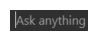

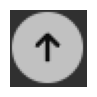

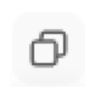

In [60]:
for key, value in event_data_with_clicked_item_and_result_model.items():
    patch64, _ = extract_bbox_patch(value[0][0], value[1])
    plot_base64_image(patch64, figsize=(1,1))
    

In [61]:
# list all parsed_content_results source types
for i, result in enumerate(omni_inference_data):
    sources = set() 
    for item in result.parsed_content_results:
        sources.add(item.source)
    print(f"Result {i} has sources: {sources}")


Result 0 has sources: {'box_yolo_content_yolo', 'box_ocr_content_ocr', 'box_yolo_content_ocr'}
Result 1 has sources: {'box_yolo_content_yolo', 'box_ocr_content_ocr', 'box_yolo_content_ocr'}
Result 2 has sources: {'box_yolo_content_yolo', 'box_ocr_content_ocr', 'box_yolo_content_ocr'}
Result 3 has sources: {'box_yolo_content_yolo', 'box_ocr_content_ocr', 'box_yolo_content_ocr'}


In [15]:
for result in omni_inference_data:
    # Print each item in the parsed_content_list vertically
    for i, item in enumerate(result.parsed_content_results):
        print(f"Item {i}:")
        for key, value in item.to_dict().items():
            print(f"  {key}: {value}")
        print()  # Empty line between items

Item 0:
  type: text
  bbox: [0.03697916492819786, 0.012037036940455437, 0.0963541641831398, 0.026851851493120193]
  interactivity: False
  content: (12) Dheere Dhheere
  source: box_ocr_content_ocr
  id: 0

Item 1:
  type: text
  bbox: [0.14531250298023224, 0.013888888992369175, 0.19843749701976776, 0.028703704476356506]
  interactivity: False
  content: Build Vision Agent
  source: box_ocr_content_ocr
  id: 1

Item 2:
  type: text
  bbox: [0.20156249403953552, 0.013888888992369175, 0.21822915971279144, 0.026851851493120193]
  interactivity: False
  content: Scree
  source: box_ocr_content_ocr
  id: 2

Item 3:
  type: text
  bbox: [0.2536458373069763, 0.012037036940455437, 0.3046875, 0.029629629105329514]
  interactivity: False
  content: Chats * Instagram
  source: box_ocr_content_ocr
  id: 3

Item 4:
  type: text
  bbox: [0.3619791567325592, 0.013888888992369175, 0.4151041805744171, 0.026851851493120193]
  interactivity: False
  content: (182) Codementor
  source: box_ocr_content_oc

In [26]:
# show all ocr only items
for i, result in enumerate(omni_inference_data):
    text_items = []
    for item in result.parsed_content_results:
        if item.source == "box_ocr_content_ocr" or item.source == "box_yolo_content_ocr":
            text_items.append(item.content)
    if len(text_items) > 0:
        print(f"Result {i} has {len(text_items)} text items")
        for item in text_items:
            print(item)
        print("--------------------------------")




Result 0 has 92 text items
(12) Dheere Dhheere
Build Vision Agent
Scree
Chats * Instagram
(182) Codementor
X| GitHub
x | (3 maniotrixlbbox-editor
BBox Editor
Dark
Season
Watch One Piece Ena.
Watch Movies Onlin .
All Bookmarks
BLulegRouNDS
India
M7ios
IGREAMa
Favcraagt
UNNIEST NOOBRACTOMC[n2
Mix - Dheere Dhheere Se Meri Zindagi Mein Aana
Mix
NNX LXSY
HEMENESY
OHH NOI
JOINED FUNNIEST RANDOM
Full Song (Audio)
Aashiqui
Anuradha Paudwal;
NNX
LXSY, Best Phonk Music, ROUDS, and more
NOOB GIRL
& GOD LEVEL 1V4 FIGHT _
Anuradha Paudwal; Udit Narayan; Tanu Priyanka, and more
Updated today
SHAANDAR TIPS
Updated today
29K views
days ago
JalRai_
14.38
26-03-2025
github
Tguet
4K Ioizto BEST OFBOLLYWOOD TRENDING Instagram Non Stop Jukebox - Part10 49.32 MUSIC VIDEO LO-FI 2307 
Azslkiad DHEERE DHHEERE SE for ALL UPDATES Ttseriesa ( 
QATAR E X P L 0 R E T H E L U X U R Y 9:12 
Sedan that Eats Sports Cars 13.37 369 Bhp 
Batting 
Battlegrounds Mobile India 
T-Series 
Jukebox 
Home 
Bat-and-Ball Sports 
Sh

In [17]:
# search id from parsed_content_results
def search_id_from_parsed_content_results(id: int, 
                                        result: OmniParserResultModel,
                                        interactive: bool = True):
    for i, item in enumerate(result.parsed_content_results):
        # print(f"Checking item {i}: id={item.id}, interactivity={item.interactivity}")
        # print(type(item.id))
        if item.id == id and item.interactivity == interactive:
            print(f"Found matching item: {item}")
            return item
    print("No matching item found")
    return None

result = search_id_from_parsed_content_results(34, omni_inference_data[0], interactive=False)
print("Returned value:")
for key, value in result.to_dict().items():
            print(f"  {key}: {value}")




Found matching item: ParsedContentResult(type='text', bbox=[0.7447916865348816, 0.6000000238418579, 0.8177083134651184, 0.6222222447395325], interactivity=False, content='SHAANDAR TIPS', source='box_ocr_content_ocr', id=34)
Returned value:
  type: text
  bbox: [0.7447916865348816, 0.6000000238418579, 0.8177083134651184, 0.6222222447395325]
  interactivity: False
  content: SHAANDAR TIPS
  source: box_ocr_content_ocr
  id: 34


In [ ]:
parsed_result_item: OmniParserResultModel = omni_inference_data[0]

from omni_helper import update_omniparser_result_model
id_to_update = 135
print(f"Updating omniparser result model for id {id_to_update}")
parsed_result_item = update_omniparser_result_model(parsed_result_item, id_to_update, update_content="Menu")

new_result = search_id_from_parsed_content_results(135, omni_inference_data[0])
print("new result:  ")
for key, value in new_result.to_dict().items():
    print(f"  {key}: {value}")






In [ ]:
# append a new item to omniparser result model
from omni_helper import append_omniparser_result_model
parsed_result_item: OmniParserResultModel = omni_inference_data[0]


new_item_details = {
    "content": "Menu2",
    "bbox": [0.008861908689141273, 0.12109177559614182, 0.03770790621638298, 0.1731482893228531],
    "interactivity": True,
    "source": "box_yolo_content_yolo",
    "type": "icon"
}

parsed_result_item = append_omniparser_result_model(parsed_result_item, 
                                                    new_item_details['content'],
                                                    new_item_details['bbox'],
                                                    new_item_details['interactivity'],
                                                    new_item_details['source'],
                                                    new_item_details['type']
                                                    )

print("Appended result:  ")
for key, value in parsed_result_item.parsed_content_results[-1].to_dict().items():
    print(f"  {key}: {value}")


In [10]:
# from omni_helper import delete_item_from_omniparser_result_model
# omni_result_item = omni_inference_data[0]
# id_to_delete = omni_result_item.parsed_content_results[-1].id
# delete_item_from_omniparser_result_model(omni_result_item, id_to_delete)
# print("Successfully deleted item with id: ", id_to_delete)


image size:  1920 1080


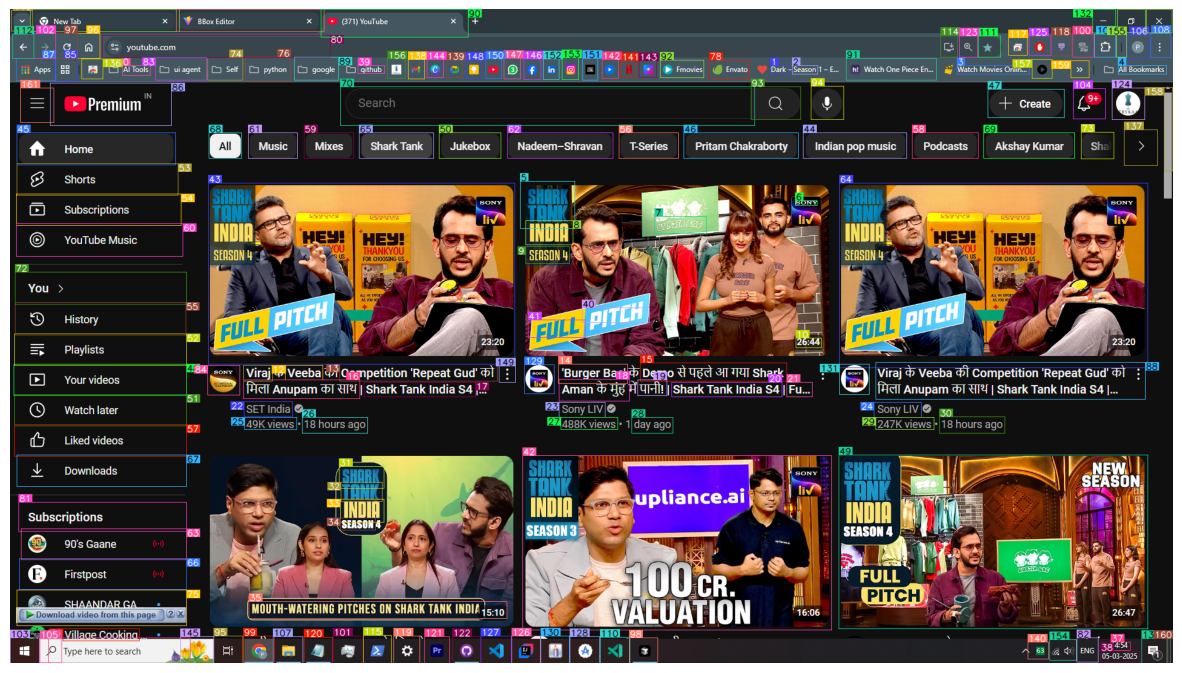

In [11]:
from omni_helper import annotate_omniparser_result_model

b64_iamge = annotate_omniparser_result_model(omni_inference_data[0])

plot_base64_image(b64_iamge)
